In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

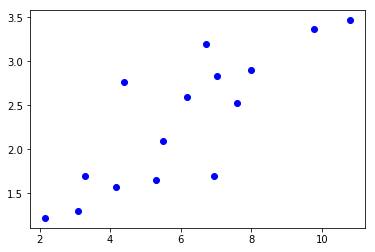

In [3]:
plt.plot(x_train, y_train, 'bo')

In [4]:
x_train_tensor = torch.from_numpy(x_train)
y_train_tensor = torch.from_numpy(y_train)
inputs = Variable(x_train_tensor)
target = Variable(y_train_tensor)
w = Variable(torch.randn(1), requires_grad=True)
b = Variable(torch.zeros(1), requires_grad=True)

In [5]:
def LinearModel(x):
    return x * w + b
y_ = LinearModel(inputs)

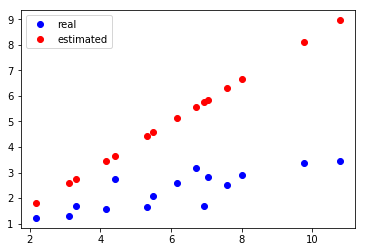

In [6]:
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [7]:
def GetLoss(y_, y):
    return torch.mean((y_ - y) ** 2)
loss = GetLoss(y_, target)
print(loss)

tensor(9.3525, grad_fn=<MeanBackward1>)


In [8]:
loss.backward()

In [9]:
print(w.grad)
print(b.grad)

tensor([39.2737])
tensor([5.4312])


In [10]:
w.data = w.data - 1e-2 * w.grad.data
b.data = b.data - 1e-2 * b.grad.data

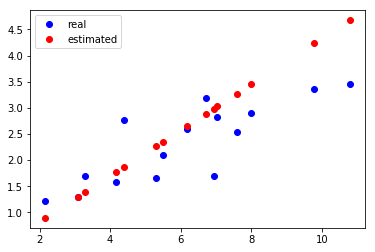

In [11]:
y_ = LinearModel(inputs)
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_.data.numpy(), 'ro', label='estimated')
plt.legend()

In [12]:
for e in range(10):
    y_ = LinearModel(inputs)
    loss = GetLoss(y_, target)
    w.grad.zero_()
    b.grad.zero_()
    loss.backward()
    w.data = w.data - 1e-2 * w.grad.data
    b.data = b.data - 1e-2 * b.grad.data
    print('Epoch: {}, loss: {}'.format(e, loss.data[0]))

Epoch: 0, loss: 0.42344188690185547
Epoch: 1, loss: 0.25776129961013794
Epoch: 2, loss: 0.2542635202407837
Epoch: 3, loss: 0.2537693679332733
Epoch: 4, loss: 0.25333303213119507
Epoch: 5, loss: 0.25290000438690186
Epoch: 6, loss: 0.2524692118167877
Epoch: 7, loss: 0.2520405352115631
Epoch: 8, loss: 0.25161412358283997
Epoch: 9, loss: 0.2511898875236511


/Users/wansizhe/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  if __name__ == '__main__':


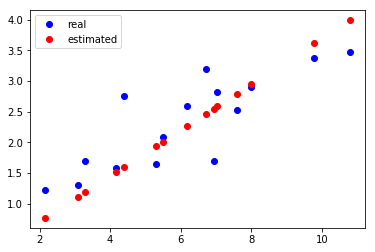

In [13]:
y_ = LinearModel(inputs)
plt.plot(x_train, y_train, 'bo', label='real')
plt.plot(x_train, y_.data.numpy(), 'ro', label='estimated')
plt.legend()